## Forecast the Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_excel('Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


## EDA

In [5]:
df.shape

(96, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [8]:
df.describe(include='all')

,Month,Passengers
count,96,96.000000
unique,96,NaN
top,1995-01-01 00:00:00,NaN
freq,1,NaN
first,1995-01-01 00:00:00,NaN
last,2002-12-01 00:00:00,NaN
mean,NaN,213.708333
std,NaN,71.918216
min,NaN,104.000000
25%,NaN,156.000000


In [9]:
df.set_index('Month', inplace=True)
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [10]:
# Data for models
df['t'] = np.arange(1,97)
df['t_square'] = np.square(df['t'])
df['log_passengers'] = np.log(df['Passengers'])
df

,Passengers,t,t_square,log_passengers
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791
...,...,...,...,...
2002-08-01,405,92,8464,6.003887
2002-09-01,355,93,8649,5.872118
2002-10-01,306,94,8836,5.723585


## Data Visualization

In [13]:
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 200
sns.set_style('darkgrid')

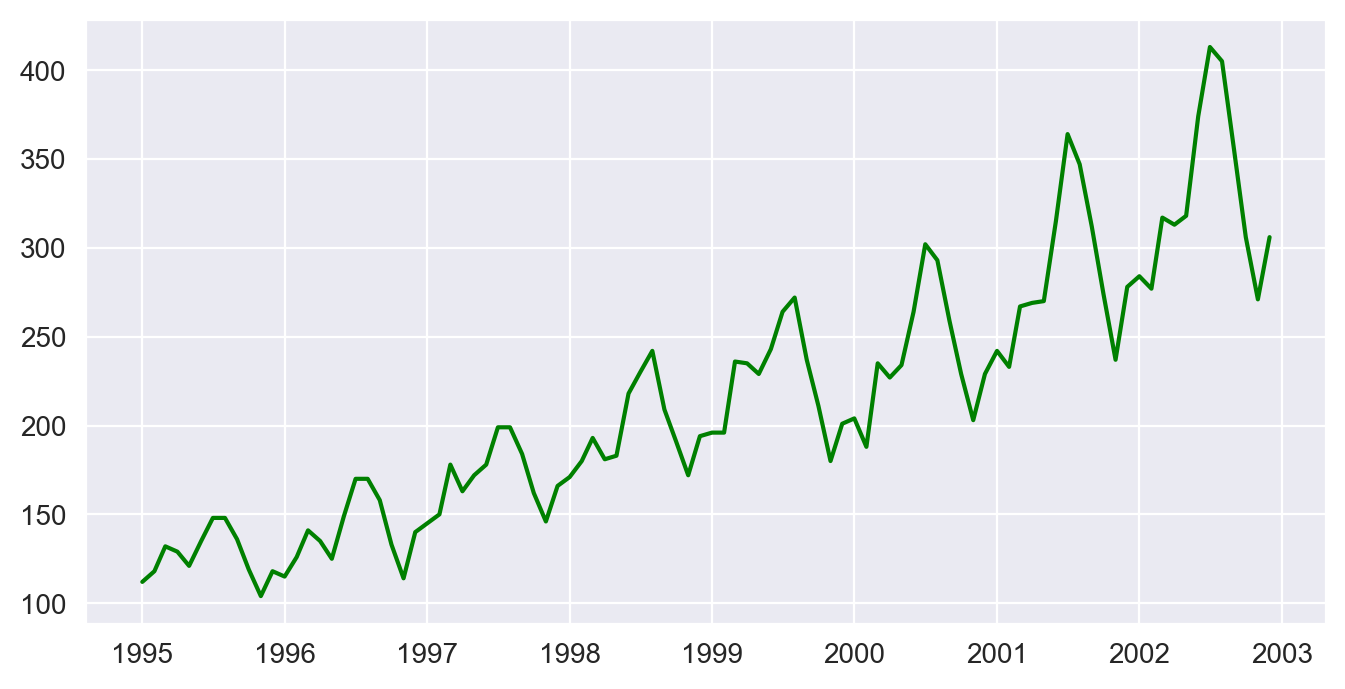

In [14]:
plt.plot(df['Passengers'], c='green')

<AxesSubplot:xlabel='Passengers', ylabel='Count'>

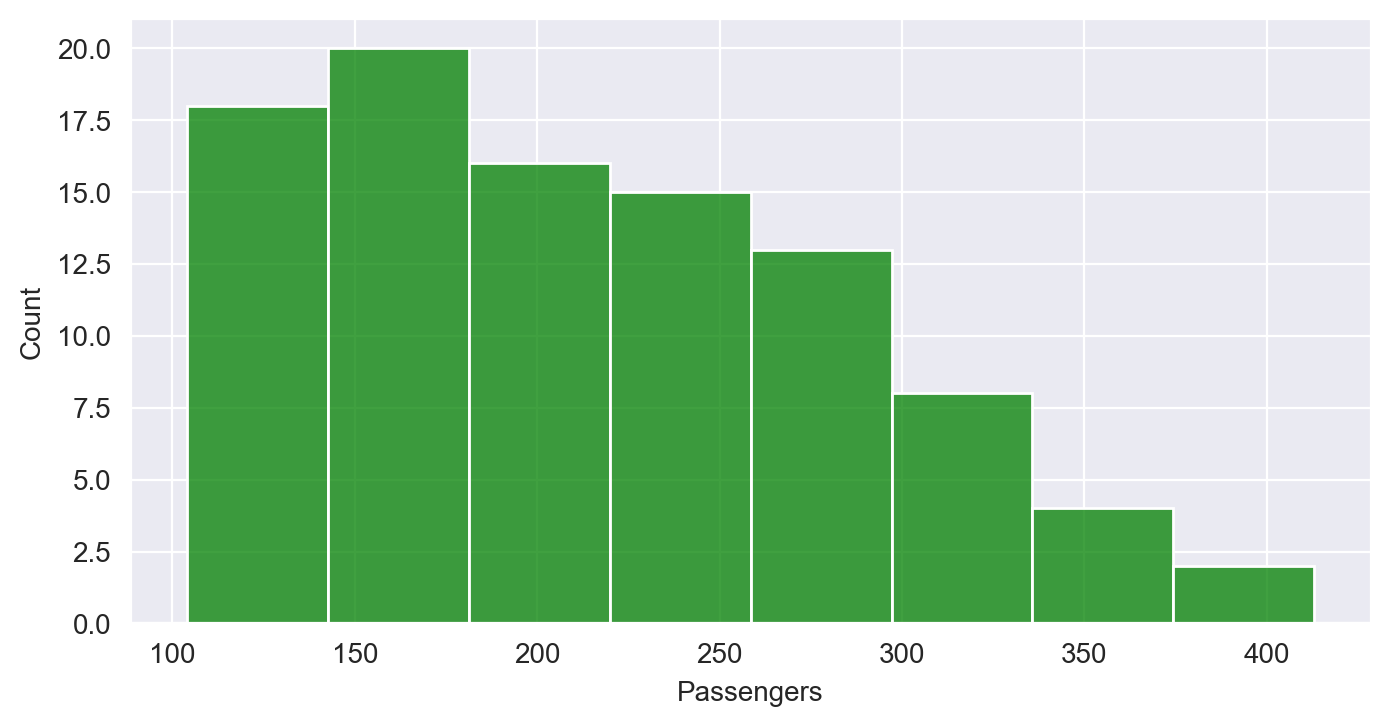

In [15]:
sns.histplot(df['Passengers'], color='green')

<AxesSubplot:xlabel='Passengers'>

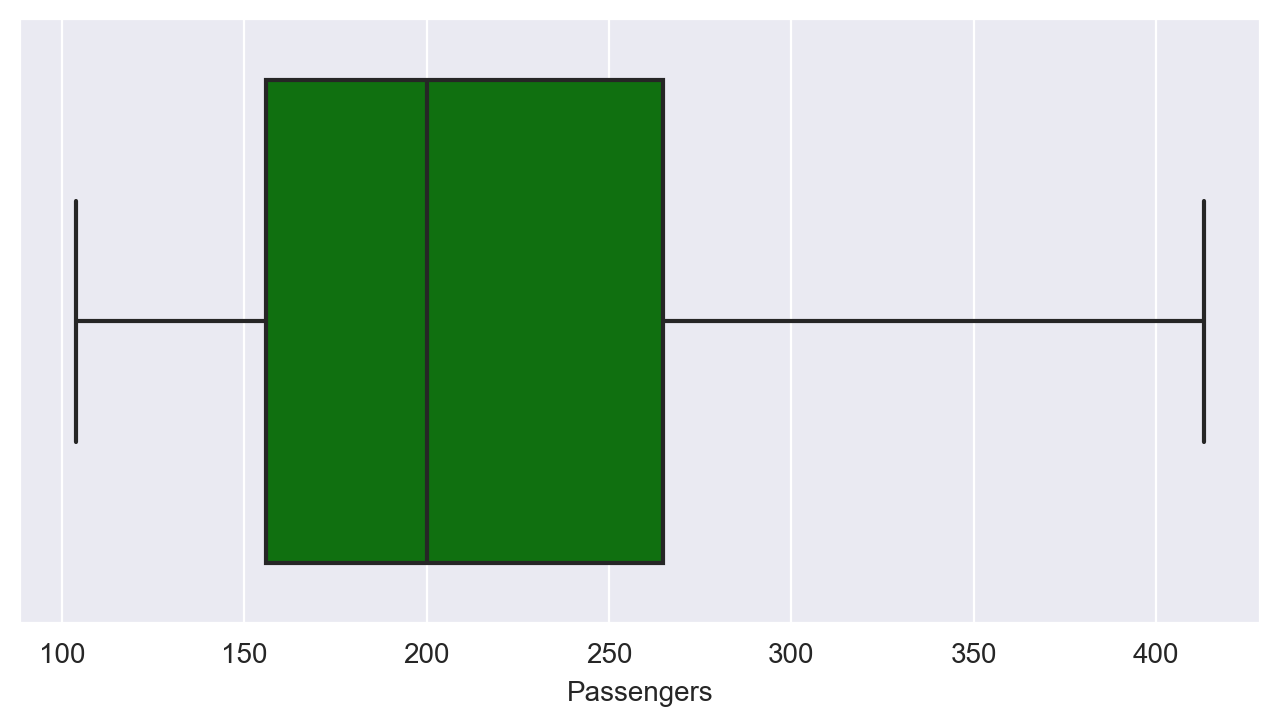

In [18]:
sns.boxplot(df['Passengers'], color='green')

<AxesSubplot:xlabel='Passengers', ylabel='Density'>

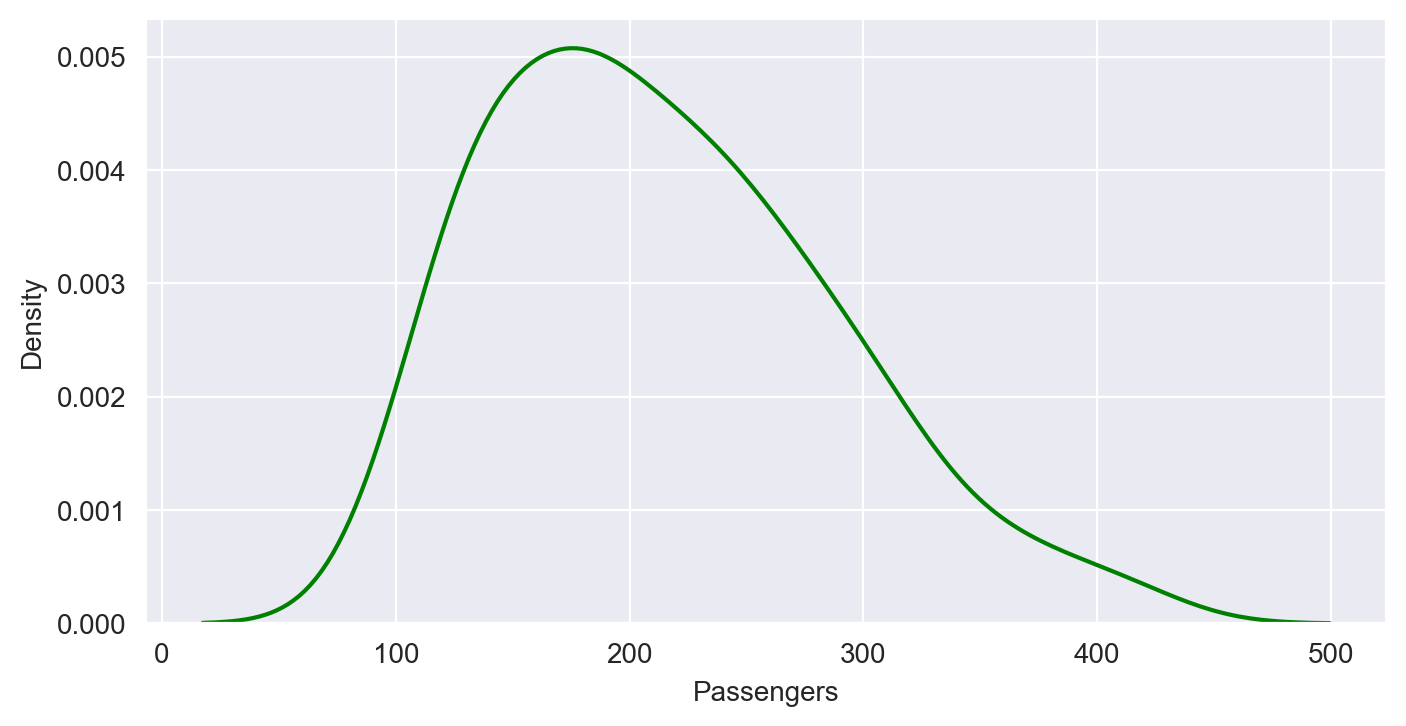

In [19]:
sns.kdeplot(df['Passengers'],color='green')

## Splitting Data

In [20]:
x = df.head(80)
y = df.tail(16)

## Model based Forecasting Methods

In [21]:
df.head(2)

,Passengers,t,t_square,log_passengers
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685


##  Linear Model

In [22]:
linear = smf.ols('Passengers~t',data=x).fit()
pred_linear = pd.Series(linear.predict((y[['t']])))
rmse_linear = np.sqrt(mean_squared_error(y['Passengers'],pred_linear))
rmse_linear

47.542624067726784

## Exponential Model 

In [23]:
exp = smf.ols('log_passengers~t', data=x).fit()
pred_exp = pd.Series(exp.predict(y[['t']]))
rmse_exp = np.sqrt(mean_squared_error(y['Passengers'], pred_exp))
rmse_exp

312.8892354482463

## Quadratic Model

In [25]:
quad = smf.ols('Passengers~t+t_square', data=x).fit()
pred_quad = pd.Series(quad.predict(y[['t', 't_square']]))
rmse_quad = np.sqrt(mean_squared_error(y['Passengers'], pred_quad))
rmse_quad

43.654403695842056

## Dataset type

In [26]:
# P-value
adfuller(df['Passengers'])[1]

0.9968250481137263

#### According the P-value, the dataset is not stationary as the p value is greater than alpha value(0.05).

## Arima Model

In [27]:
# Finding out order of arima
order = auto_arima(df['Passengers'])
order

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [28]:
# Arima Model
arima = ARIMA(x['Passengers'],order=(3,1,2)).fit()

## Evaluating Model 

In [29]:
df.shape

(96, 4)

In [30]:
x.shape

(80, 4)

In [31]:
ypred = arima.predict(start=80, end=95)
ypred

2001-09-01    321.684298
2001-10-01    307.972982
2001-11-01    298.507567
2001-12-01    297.632705
2002-01-01    296.317434
2002-02-01    298.349022
2002-03-01    298.004516
2002-04-01    299.411116
2002-05-01    298.756225
2002-06-01    299.554078
2002-07-01    298.871944
2002-08-01    299.432021
2002-09-01    298.887470
2002-10-01    299.337292
2002-11-01    298.923537
2002-12-01    299.285201
Freq: MS, Name: predicted_mean, dtype: float64

In [32]:
y

,Passengers,t,t_square,log_passengers
Month,,,,
2001-09-01,312,81,6561,5.743003
2001-10-01,274,82,6724,5.613128
2001-11-01,237,83,6889,5.468060
2001-12-01,278,84,7056,5.627621
2002-01-01,284,85,7225,5.648974
2002-02-01,277,86,7396,5.624018
2002-03-01,317,87,7569,5.758902
2002-04-01,313,88,7744,5.746203
2002-05-01,318,89,7921,5.762051


In [33]:
rmse_arima = np.sqrt(mean_squared_error(y['Passengers'], ypred))
rmse_arima

50.41683044173065

## Results

In [34]:
data = {
    'Model' : ['Linear model', 'Exponential model','Quadratic model', 'Arima model'],
    'RMSE Values' : [rmse_linear, rmse_exp, rmse_quad, rmse_arima]
}
result = pd.DataFrame(data)
result

,Model,RMSE Values
0,Linear model,47.542624
1,Exponential model,312.889235
2,Quadratic model,43.654404
3,Arima model,50.416830


## Building final model with least RMSE value ie. Quadratic Model

In [35]:
final_model = smf.ols('Passengers~t+t_square', data=df).fit()
pred_final_model = pd.Series(quad.predict(df[['t', 't_square']]))
rmse_final_model = np.sqrt(mean_squared_error(df['Passengers'], pred_final_model))
rmse_final_model

29.60438087312997

In [37]:
forecast = {
    'Actual' : df['Passengers'],
    'Predicted' : pred_final_model
}
Forecast = pd.DataFrame(forecast)
Forecast

,Actual,Predicted
Month,,
1995-01-01,112,119.217164
1995-02-01,118,120.503952
1995-03-01,132,121.813530
1995-04-01,129,123.145897
1995-05-01,121,124.501053
...,...,...
2002-08-01,405,329.637429
2002-09-01,355,332.998052
2002-10-01,306,336.381463
